In [2]:
from numpy import loadtxt
from numpy import unique

data = loadtxt('oil-spill.csv', delimiter=',')
data

array([[1.00000e+00, 2.55800e+03, 1.50609e+03, ..., 6.57400e+01,
        7.95000e+00, 1.00000e+00],
       [2.00000e+00, 2.23250e+04, 7.91100e+01, ..., 6.57300e+01,
        6.26000e+00, 0.00000e+00],
       [3.00000e+00, 1.15000e+02, 1.44985e+03, ..., 6.58100e+01,
        7.84000e+00, 1.00000e+00],
       ...,
       [2.02000e+02, 1.40000e+01, 2.51400e+01, ..., 6.59100e+01,
        6.12000e+00, 0.00000e+00],
       [2.03000e+02, 1.00000e+01, 9.60000e+01, ..., 6.59700e+01,
        6.32000e+00, 0.00000e+00],
       [2.04000e+02, 1.10000e+01, 7.73000e+00, ..., 6.56500e+01,
        6.26000e+00, 0.00000e+00]])

Oill spill dataset info : https://www.kaggle.com/ashrafkhan94/oil-spill

In [16]:
data[:,2]

array([1506.09,   79.11, 1449.85, 1562.53,  950.27, 1438.13, 1446.29,
         28.68,  964.23,  903.02, 1127.41, 1627.54, 1091.56, 1537.68,
       1020.91, 1118.08, 1249.47, 1776.55, 1304.9 , 1700.15, 1533.91,
       1761.3 , 1344.49, 1095.47, 1628.99, 1422.2 , 1608.04, 1501.49,
       1579.09, 1732.7 , 1687.61, 1546.64, 1765.53, 1576.57, 1774.4 ,
        874.62, 1705.68, 1664.47, 1748.69,  789.05, 1551.46, 1029.52,
       1706.47, 1757.65, 1566.62,  780.77, 1420.22,  124.96,  902.43,
       1557.99, 1573.27, 1690.45, 1636.26, 1688.79, 1749.56, 1042.43,
        761.48, 1740.51, 1726.89, 1762.49, 1388.71, 1729.  , 1563.39,
       1707.7 , 1742.82, 1615.63, 1501.54, 1223.48, 1698.65, 1294.7 ,
       1153.32, 1485.98, 1608.88, 1506.37, 1645.07,  779.4 , 1563.17,
       1713.1 , 1596.89,  762.26, 1601.62, 1096.68, 1545.03, 1668.24,
        724.57, 1583.82, 1378.47, 1528.2 , 1547.12, 1756.95, 1714.19,
       1693.53, 1260.7 , 1652.95,   23.64, 1338.75,  769.73, 1785.22,
       1455.16, 1657

In [3]:
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


Columns with single value, do not provide information for modelling. For example column 22 only have 1 value.

The following code returns the same output than the previous one, but in a more concise way:

In [4]:
from pandas import read_csv
df = read_csv('oil-spill.csv', header=None)
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [3]:
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


Column 22 was removed and the shape of the dataframe shrinks accordingly.

In [9]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique

data = loadtxt('oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


The previous chunk reveals some variables with **near zero variance**, this columns may or may not contribute to predictive power of the model. This variables can result in errors in some models

In [5]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	if percentage < 1:
		print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


11 variables have < 1% of unique values. This does not mean this variables should be deleted but we shoud pay attention to these.

In [6]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


Alternative way for remove low variance predictors from sklearn

In [10]:
# example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold

# load the dataset
df = read_csv('oil-spill.csv', header=None)

# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1] # last column
print(X.shape, y.shape)

# define the transform
transform = VarianceThreshold() # defaults to 0

# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


Defining several thresholds: 

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


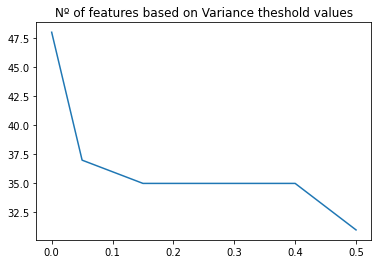

In [21]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

df = read_csv('oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.title("Nº of features based on Variance theshold values")
pyplot.show()